In [1]:
# import

import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import datetime
from matplotlib import font_manager

In [2]:
# 데이터 불러오기
(x_train, y_train),(x_test,y_test) = mnist.load_data()

# 전처리
x_train = x_train.reshape((60000,28,28,1))
x_train = x_train.astype('float32')
x_train /= 255
x_test = x_test.reshape((10000,28,28,1))
x_test = x_test.astype('float32')
x_test /= 255

In [3]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [4]:
init = tf.keras.initializers.he_normal()
act = tf.keras.activations.relu

# init = tf.keras.initializers.he_normal()
# act = tf.keras.layers.LeakyReLU(alpha=0.3)

# init = tf.keras.initializers.he_uniform()
# act = tf.keras.layers.LeakyReLU(alpha=0.3)

In [15]:
# 모델 생성

model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(2,2), input_shape = (28,28,1)))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(2,2), activation = act))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Conv2D(128, kernel_size=(2,2), activation = act))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units = 10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 27, 27, 32)        160       
                                                                 
 conv2d_7 (Conv2D)           (None, 26, 26, 64)        8256      
                                                                 
 batch_normalization_1 (Bat  (None, 26, 26, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 13, 13, 64)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 12, 12, 128)      

In [ ]:
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape = (28,28,1)))
# model.add(tf.keras.layers.MaxPooling2D(2,2))
# model.add(tf.keras.layers.Conv2D(64,(3,3), activation='relu'))
# model.add(tf.keras.layers.MaxPooling2D(2,2))
# model.add(tf.keras.layers.Conv2D(64,(3,3), activation='relu'))
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(64, activation='relu'))
# model.add(tf.keras.layers.Dense(10, activation='softmax'))

# model.summary()

In [16]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer = opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=3,
    verbose=2,
    mode='auto'

)

In [ ]:
ret = model.fit(x_train, y_train, verbose=1, epochs=10, batch_size=64, 
                validation_data=(x_test, y_test), callbacks = [callback])

In [11]:
train_loss, train_acc = model.evaluate(x_train, y_train, verbose = 1)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose = 1)

313/313 [==============================] - 2s 6ms/step - loss: 0.0356 - accuracy: 0.9894


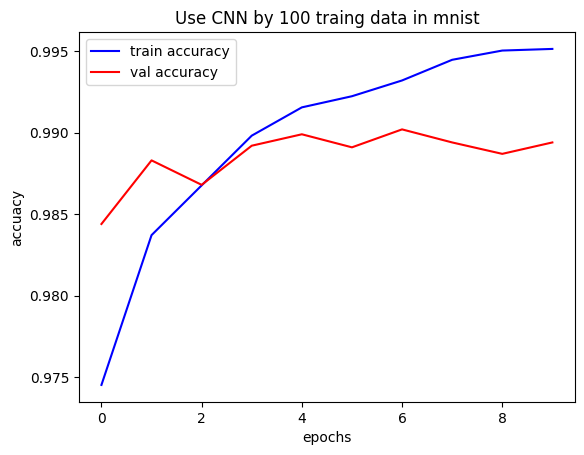

In [12]:
n = 100
plt.title("Use CNN by %s traing data in mnist"%n)
plt.plot(ret.history['accuracy'], 'b-', label = 'train accuracy')
plt.plot(ret.history['val_accuracy'], 'r-', label = 'val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuacy')
plt.legend(loc = 'best')
plt.show()